# Flip Flop

In [43]:
import numpy as np
import pandas as pd
import mlrose_hiive
import matplotlib.pyplot as plt
import time as tm

# Problem Length and Best Fitness

In [28]:
fitness = mlrose_hiive.FlipFlop()
random_state = 7
problem_length_array = range(1, 150, 20)
rhc_best_fitness = np.zeros(len(problem_length_array))
rhc_stats_1 = []
sa_stats_1 = []
ga_stats_1  = []
mimic_stats_1 = []
max_attempts = 100
max_iters = 100

for problem_length in problem_length_array:
    ## Random Hill Climb
    problem = mlrose_hiive.DiscreteOpt(length=problem_length, fitness_fn=fitness, maximize=True)
   
    start_time = tm.time()
    rhc_best_state, rhc_best_fitness,_ = mlrose_hiive.random_hill_climb(problem,
                                                   max_attempts = max_attempts, max_iters = max_iters,
                                                      curve=False, random_state = random_state)
    end_time = tm.time()
    rhc_time = end_time - start_time
    rhc_stats_1.append((problem_length,rhc_best_fitness,rhc_time))
    
    # Simulated Annealing
    # Define decay schedule
    schedule = mlrose_hiive.ExpDecay()
    start_time = tm.time()
    sa_best_state, sa_best_fitness,_  = mlrose_hiive.simulated_annealing(problem, schedule = schedule,
                                                      max_attempts = max_attempts, max_iters = max_iters,
                                                      curve=False, random_state = random_state)
    end_time = tm.time()
    sa_time = end_time - start_time
    sa_stats_1.append((problem_length,sa_best_fitness,sa_time))
    
    # Genetic Algorithm
    start_time = tm.time()
    ga_best_state, ga_best_fitness,_ = mlrose_hiive.genetic_alg(problem, pop_size=100, mutation_prob=0.2, 
                                                                max_attempts=max_attempts, max_iters=max_iters, 
                                                                curve=False, random_state=random_state)
    end_time = tm.time()
    ga_time = end_time - start_time
    ga_stats_1.append((problem_length,ga_best_fitness,ga_time))
    
    # MIMIC
    start_time = tm.time()
    mimic_best_state, mimic_best_fitness,_ = mlrose_hiive.mimic(problem, pop_size=50, keep_pct=0.1, 
                                                                max_attempts=max_attempts,max_iters=max_iters, 
                                                                curve=False, random_state=random_state)
    end_time = tm.time()
    mimic_time = end_time - start_time
    mimic_stats_1.append((problem_length,mimic_best_fitness,mimic_time))
    

In [29]:
rhc_stats_1 = np.array(rhc_stats_1)
sa_stats_1 = np.array(sa_stats_1)
ga_stats_1 = np.array(ga_stats_1)
mimic_stats_1 = np.array(mimic_stats_1)

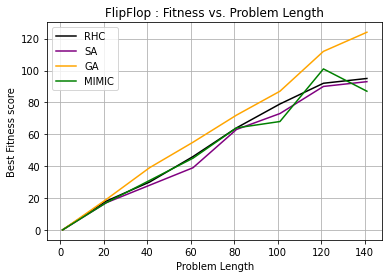

In [37]:
plt.figure()
plt.plot(rhc_stats_1[:,[0]], rhc_stats_1[:,[1]],  label='RHC', color='black')
plt.plot(sa_stats_1[:,[0]], sa_stats_1[:,[1]],  label='SA', color='purple')
plt.plot(ga_stats_1[:,[0]], ga_stats_1[:,[1]],  label='GA', color='orange')
plt.plot(mimic_stats_1[:,[0]], mimic_stats_1[:,[1]],  label='MIMIC', color='green')
plt.title('FlipFlop : Fitness vs. Problem Length')
plt.xlabel('Problem Length')
plt.ylabel("Best Fitness score")
plt.legend(loc="best")
plt.grid()
plt.show()

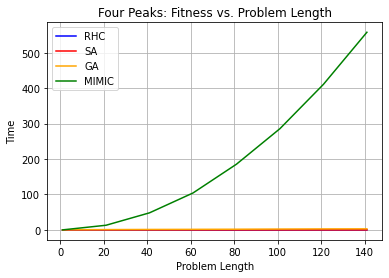

In [31]:
plt.figure()
plt.plot(rhc_stats_1[:,[0]], rhc_stats_1[:,[2]],  label='RHC', color='blue')
plt.plot(sa_stats_1[:,[0]], sa_stats_1[:,[2]],  label='SA', color='red')
plt.plot(ga_stats_1[:,[0]], ga_stats_1[:,[2]],  label='GA', color='orange')
plt.plot(mimic_stats_1[:,[0]], mimic_stats_1[:,[2]],  label='MIMIC', color='green')
plt.title('Four Peaks: Fitness vs. Problem Length')
plt.xlabel('Problem Length')
plt.ylabel("Time")
plt.legend(loc="best")
plt.grid()
plt.show()

In [39]:
print(rhc_stats_1[:,[2]])

[[0.00179887]
 [0.0053103 ]
 [0.00947022]
 [0.01311994]
 [0.01630712]
 [0.02106214]
 [0.0254128 ]
 [0.02875519]]


In [40]:
sa_stats_1[:,[2]]

array([[0.00266504],
       [0.00830293],
       [0.01493692],
       [0.019804  ],
       [0.02570605],
       [0.03080487],
       [0.03676391],
       [0.04565024]])

In [41]:
ga_stats_1[:,[2]]

array([[0.46203113],
       [0.91706419],
       [1.30518293],
       [1.60392594],
       [1.94389677],
       [2.43175912],
       [2.83056116],
       [3.02114892]])

In [42]:
mimic_stats_1[:,[2]]

array([[1.03951931e-01],
       [1.31716032e+01],
       [4.82023098e+01],
       [1.04247373e+02],
       [1.85490771e+02],
       [2.85781749e+02],
       [4.10834681e+02],
       [5.57914628e+02]])

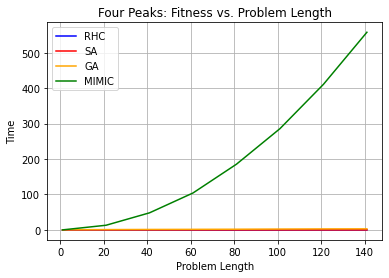

In [32]:
plt.figure()
plt.plot(rhc_stats_1[:,[0]], rhc_stats_1[:,[2]],  label='RHC', color='blue')
plt.plot(sa_stats_1[:,[0]], sa_stats_1[:,[2]],  label='SA', color='red')
plt.plot(ga_stats_1[:,[0]], ga_stats_1[:,[2]],  label='GA', color='orange')
plt.plot(mimic_stats_1[:,[0]], mimic_stats_1[:,[2]],  label='MIMIC', color='green')
plt.title('Four Peaks: Fitness vs. Problem Length')
plt.xlabel('Problem Length')
plt.ylabel("Time")
plt.legend(loc="best")
plt.grid()
plt.show()

# Max Iteration and Fitness


In [33]:
random_state = 7
max_iters_array = range(1, 500, 15)
rhc_best_fitness = np.zeros(len(problem_length_array))
rhc_stats = []
sa_stats = []
ga_stats  = []
mimic_stats = []
max_attempts = 1000
max_iters = 100
problem_length = 50

for max_iters in max_iters_array:
    ## Random Hill Climb
    
    problem = mlrose_hiive.DiscreteOpt(length=problem_length, fitness_fn=fitness, maximize=True)
   
    start_time = tm.time()
    rhc_best_state, rhc_best_fitness,_ = mlrose_hiive.random_hill_climb(problem,
                                                   max_attempts = max_attempts, max_iters = max_iters,
                                                      curve=False, random_state = random_state)
    end_time = tm.time()
    rhc_time = end_time - start_time
    rhc_stats.append((max_iters,rhc_best_fitness,rhc_time))
    
    # Simulated Annealing
    # Define decay schedule
    schedule = mlrose_hiive.ExpDecay()
    start_time = tm.time()
    sa_best_state, sa_best_fitness,_  = mlrose_hiive.simulated_annealing(problem, schedule = schedule,
                                                      max_attempts = max_attempts, max_iters = max_iters,
                                                      curve=False, random_state = random_state)
    end_time = tm.time()
    sa_time = end_time - start_time
    sa_stats.append((max_iters,sa_best_fitness,sa_time))
    
    # Genetic Algorithm
    start_time = tm.time()
    ga_best_state, ga_best_fitness,_ = mlrose_hiive.genetic_alg(problem, pop_size=200, mutation_prob=0.2, 
                                                                max_attempts=max_attempts, max_iters=max_iters, 
                                                                curve=False, random_state=random_state)
    end_time = tm.time()
    ga_time = end_time - start_time
    ga_stats.append((max_iters,ga_best_fitness,ga_time))
    
    # MIMIC
    start_time = tm.time()
    mimic_best_state, mimic_best_fitness,_ = mlrose_hiive.mimic(problem, pop_size=200, keep_pct=0.25, 
                                                                max_attempts=max_attempts,max_iters=max_iters, 
                                                                curve=False, random_state=random_state)
    end_time = tm.time()
    mimic_time = end_time - start_time
    mimic_stats.append((max_iters,mimic_best_fitness,mimic_time))
    

In [34]:
rhc_stats = np.array(rhc_stats)
sa_stats = np.array(sa_stats)
ga_stats = np.array(ga_stats)
mimic_stats = np.array(mimic_stats)

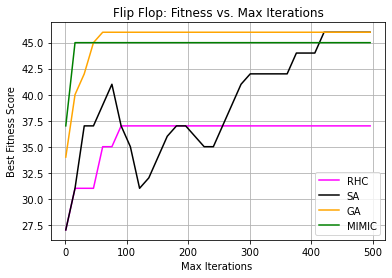

In [38]:
plt.figure()
plt.plot( rhc_stats[:,[0]], rhc_stats[:,[1]],  label='RHC', color='magenta')
plt.plot(sa_stats[:,[0]], sa_stats[:,[1]],  label='SA', color='black')
plt.plot( ga_stats[:,[0]], ga_stats[:,[1]],  label='GA', color='orange')
plt.plot(mimic_stats[:,[0]], mimic_stats[:,[1]],  label='MIMIC', color='green')
plt.title('Flip Flop: Fitness vs. Max Iterations')
plt.xlabel('Max Iterations ')
plt.ylabel("Best Fitness Score")
plt.legend(loc="best")
plt.grid()
plt.show()

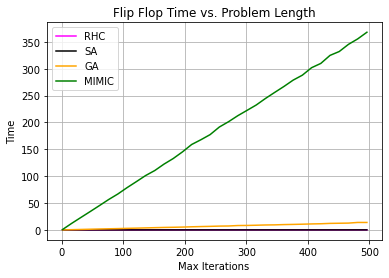

In [36]:
plt.figure()
plt.plot( rhc_stats[:,[0]], rhc_stats[:,[2]],  label='RHC', color='magenta')
plt.plot(sa_stats[:,[0]], sa_stats[:,[2]],  label='SA', color='black')
plt.plot( ga_stats[:,[0]], ga_stats[:,[2]],  label='GA', color='orange')
plt.plot(mimic_stats[:,[0]], mimic_stats[:,[2]],  label='MIMIC', color='green')
plt.title('Flip Flop Time vs. Problem Length')
plt.xlabel('Max Iterations ')
plt.ylabel("Time")
plt.legend(loc="best")
plt.grid()
plt.show()

# Paramenter Tuning 

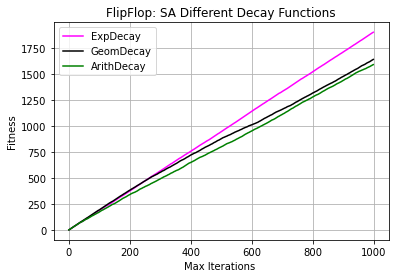

In [39]:
fitness = mlrose_hiive.FlipFlop()
problem = mlrose_hiive.DiscreteOpt(length=100, fitness_fn=fitness, maximize=True)
random_state = 7
schedule = mlrose_hiive.ExpDecay(init_temp=10, exp_const=0.05, min_temp=5)
sa_best_state, sa_best_fitness_exp,sa_best_fitness_curve_exp  = mlrose_hiive.simulated_annealing(
                                                                    problem, schedule = schedule,
                                                                    max_attempts = 100, max_iters = 1000,
                                                                    curve=True, random_state = random_state)

schedule=mlrose_hiive.GeomDecay(init_temp=20, decay=0.99 , min_temp=1)
sa_best_state, sa_best_fitness_geom,sa_best_fitness_curve_geom  = mlrose_hiive.simulated_annealing(
                                                                        problem, schedule = schedule,
                                                                        max_attempts = 100, max_iters = 1000,
                                                                        curve=True, random_state = random_state)

schedule=mlrose_hiive.ArithDecay(init_temp=20, decay=0.99, min_temp=1)
sa_best_state, sa_best_fitness_arith,sa_best_fitness_curve_arith  = mlrose_hiive.simulated_annealing(
                                                                        problem, schedule = schedule,
                                                                        max_attempts = 100, max_iters = 1000,
                                                                        curve=True, random_state = random_state)

plt.figure()
plt.plot( sa_best_fitness_curve_exp[:,[1]],  label='ExpDecay', color='magenta')
plt.plot(sa_best_fitness_curve_geom[:,[1]],  label='GeomDecay', color='black')
plt.plot(sa_best_fitness_curve_arith[:,[1]] ,  label='ArithDecay', color='green')
plt.title('FlipFlop: SA Different Decay Functions')
plt.xlabel('Max Iterations ')
plt.ylabel("Fitness")
plt.legend(loc="best")
plt.grid()
plt.show()


In [12]:
# RHC
# changing the restart parameter
random_state = 7
fitness = mlrose_hiive.FlipFlop() 
# starting at 15 since there are 12 edges so we need more than that 
max_attempts = 100
max_iters = 1000
problem = mlrose_hiive.DiscreteOpt(length=75, fitness_fn=fitness, maximize=True)

rhc_best_state_2, rhc_best_fitness_2, rhc_best_fitness_curve_0 = mlrose_hiive.random_hill_climb(problem,
                                                   max_attempts = max_attempts, max_iters = max_iters,
                                                      curve=True, restarts = 0,  random_state = random_state)

rhc_best_state_2, rhc_best_fitness_2, rhc_best_fitness_curve_4 = mlrose_hiive.random_hill_climb(problem,
                                                   max_attempts = max_attempts, max_iters = max_iters,
                                                      curve=True, restarts = 4,  random_state = random_state)


rhc_best_state_2, rhc_best_fitness_2, rhc_best_fitness_curve_8 = mlrose_hiive.random_hill_climb(problem,
                                                   max_attempts = max_attempts, max_iters = max_iters,
                                                      curve=True, restarts = 8,  random_state = random_state)
rhc_best_state_2, rhc_best_fitness_2, rhc_best_fitness_curve_32 = mlrose_hiive.random_hill_climb(problem,
                                                   max_attempts = max_attempts, max_iters = max_iters,
                                                      curve=True, restarts = 32,  random_state = random_state)

In [16]:
print(len(rhc_best_fitness_curve_0))
print(len(rhc_best_fitness_curve_4))
print(len(rhc_best_fitness_curve_8))
print(len(rhc_best_fitness_curve_32))


157
261
298
298
[[ 40.   1.]
 [ 40.   2.]
 [ 40.   3.]
 [ 40.   4.]
 [ 40.   5.]
 [ 40.   6.]
 [ 40.   7.]
 [ 40.   8.]
 [ 40.   9.]
 [ 40.  10.]
 [ 42.  12.]
 [ 42.  13.]
 [ 42.  14.]
 [ 42.  15.]
 [ 42.  16.]
 [ 42.  17.]
 [ 42.  18.]
 [ 42.  19.]
 [ 44.  21.]
 [ 46.  23.]
 [ 46.  24.]
 [ 46.  25.]
 [ 46.  26.]
 [ 46.  27.]
 [ 48.  29.]
 [ 48.  30.]
 [ 48.  31.]
 [ 50.  33.]
 [ 50.  34.]
 [ 50.  35.]
 [ 50.  36.]
 [ 52.  38.]
 [ 52.  39.]
 [ 52.  40.]
 [ 52.  41.]
 [ 52.  42.]
 [ 52.  43.]
 [ 52.  44.]
 [ 52.  45.]
 [ 52.  46.]
 [ 52.  47.]
 [ 52.  48.]
 [ 52.  49.]
 [ 52.  50.]
 [ 52.  51.]
 [ 52.  52.]
 [ 52.  53.]
 [ 52.  54.]
 [ 52.  55.]
 [ 54.  57.]
 [ 54.  58.]
 [ 54.  59.]
 [ 54.  60.]
 [ 56.  62.]
 [ 56.  63.]
 [ 56.  64.]
 [ 58.  66.]
 [ 58.  67.]
 [ 58.  68.]
 [ 58.  69.]
 [ 58.  70.]
 [ 58.  71.]
 [ 58.  72.]
 [ 58.  73.]
 [ 58.  74.]
 [ 58.  75.]
 [ 58.  76.]
 [ 58.  77.]
 [ 58.  78.]
 [ 58.  79.]
 [ 58.  80.]
 [ 58.  81.]
 [ 58.  82.]
 [ 58.  83.]
 [ 58.  84.]
 [ 58.  8

In [22]:
random_state = 7
fitness = mlrose_hiive.FlipFlop() 
# starting at 15 since there are 12 edges so we need more than that 
max_attempts = 100
max_iters = 1000
time_diff = [0,0,0]
problem = mlrose_hiive.DiscreteOpt(length=75, fitness_fn=fitness, maximize=True)

start_time = tm.time()
ga_best_state_2, ga_best_fitness_2_5,ga_best_fitness_curve_50 = mlrose_hiive.genetic_alg(problem, 
                                                                pop_size=50, mutation_prob=0.2, 
                                                                max_attempts=max_attempts, max_iters=max_iters, 
                                                                curve=True, random_state=random_state)
end_time = tm.time()
time_diff[0] = end_time - start_time

start_time = tm.time()
ga_best_state_2, ga_best_fitness_2_200,ga_best_fitness_curve_200 = mlrose_hiive.genetic_alg(problem, 
                                                                pop_size=200, mutation_prob=0.2, 
                                                                max_attempts=max_attempts, max_iters=max_iters, 
                                                                curve=True, random_state=random_state)
end_time = tm.time()
time_diff[1] = end_time - start_time

start_time = tm.time()
ga_best_state_2, ga_best_fitness_2_500,ga_best_fitness_curve_500 = mlrose_hiive.genetic_alg(problem, 
                                                                pop_size=500, mutation_prob=0.2, 
                                                                max_attempts=max_attempts, max_iters=max_iters, 
                                                               curve=True, random_state=random_state)
end_time = tm.time()
time_diff[2] = end_time - start_time

In [23]:
print(ga_best_fitness_2_5)
print(ga_best_fitness_2_200)
print(ga_best_fitness_2_500)
print(time_diff)

65.0
72.0
69.0
[1.695404052734375, 11.429106950759888, 17.81998109817505]


In [44]:
random_state = 7
fitness = mlrose_hiive.FlipFlop() 
# starting at 15 since there are 12 edges so we need more than that 
max_attempts = 100
max_iters = 1000
time_diff_mimic = [0,0,0]
problem = mlrose_hiive.DiscreteOpt(length=75, fitness_fn=fitness, maximize=True)

start_time = tm.time()
mimic_best_state_50, mimic_best_fitness_2_50,mimic_best_fitness_curve_50 = mlrose_hiive.mimic(problem, pop_size=50, 
                                                                keep_pct=0.2, 
                                                                max_attempts=max_attempts,max_iters=max_iters, 
                                                                curve=False, random_state=random_state)
end_time = tm.time()
time_diff_mimic[0] = end_time - start_time

start_time = tm.time()
mimic_best_state_200, mimic_best_fitness_2_200,mimic_best_fitness_curve_200 = mlrose_hiive.mimic(problem, pop_size=200, 
                                                                keep_pct=0.2, 
                                                                max_attempts=max_attempts,max_iters=max_iters, 
                                                                curve=False, random_state=random_state)
end_time = tm.time()
time_diff_mimic[1] = end_time - start_time

start_time = tm.time()
mimic_best_state_500, mimic_best_fitness_2_500,mimic_best_fitness_curve_500 = mlrose_hiive.mimic(problem, 
                                                                pop_size=500, keep_pct=0.2, 
                                                                max_attempts=max_attempts,max_iters=max_iters, 
                                                                curve=False, random_state=random_state)
end_time = tm.time()
time_diff_mimic[2] = end_time - start_time

In [46]:
print(mimic_best_fitness_2_50)
print(mimic_best_fitness_2_200)
print(mimic_best_fitness_2_500)

56.0
68.0
73.0


In [47]:
print(time_diff_mimic)

[188.22390174865723, 205.04685997962952, 229.78238010406494]
